## Import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

## Load

In [2]:
# Load data from CSV
df = pd.read_csv('data.csv', sep=';', decimal=',', thousands='.')

In [3]:
df.head()

,date,inflation,unemployment,interest rate,growth,consumer confidence,term,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 638,Unnamed: 639,Unnamed: 640,Unnamed: 641,Unnamed: 642,Unnamed: 643,Unnamed: 644,Unnamed: 645,Unnamed: 646,Unnamed: 647
0,1914-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [4]:
df['date'] = pd.to_datetime(df['date'])
inflation = df['inflation'].tolist()
unemployment = df['unemployment'].tolist()
interest_rate = df['interest rate'].tolist()
growth = df['growth'].tolist()
consumer_confidence = df['consumer confidence'].tolist()  
df = df.sort_values('date')

# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df['growth'] = df['growth'].interpolate(method='cubic')

## Plot function

In [6]:
def plot(ax, df, column_name, start_year=None, end_year=None, line=0):
    # Filter data based on start_year and end_year if specified
    if start_year and end_year:
        df_filtered = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= end_year)]
    else:
        df_filtered = df

    # Plot the specified column
    ax.plot(df_filtered['date'], df_filtered[column_name])

    # Add horizontal line at y=0
    ax.axhline(y=line, color='gray', linestyle='-', linewidth=0.5)

    # Add vertical lines for terms and get term years
    term_dates = df_filtered[df_filtered['term'].notnull()]['date']
    term_values = df_filtered[df_filtered['term'].notnull()]['term']
    term_years = [d.year for d in term_dates]

    for date, term in zip(term_dates, term_values):
        if term == 0:
            color = 'teal'
        elif term == 1:
            color = 'orangered'
        elif term == 2:
            color = 'darkslategray'
        else:
            continue  # Skip if term is not 0, 1, or 2
        ax.axvline(x=date, color=color, linestyle='--', alpha=0.7)

    # Set x-axis range
    ax.set_xlim(df_filtered['date'].min(), df_filtered['date'].max())

    # Format x-axis to show only years with term values
    ax.set_xticks([pd.Timestamp(year=y, month=1, day=1) for y in term_years])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

    # Center the x-axis labels and remove rotation
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Add a text box explaining the vertical lines
    textstr = 'Teal: No Change\nOrangered: Change\nDarkslategray: Upcoming'
    props = dict(boxstyle='square', facecolor='white', edgecolor='black', alpha=1)
    ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', horizontalalignment='left', bbox=props)


## Inflation

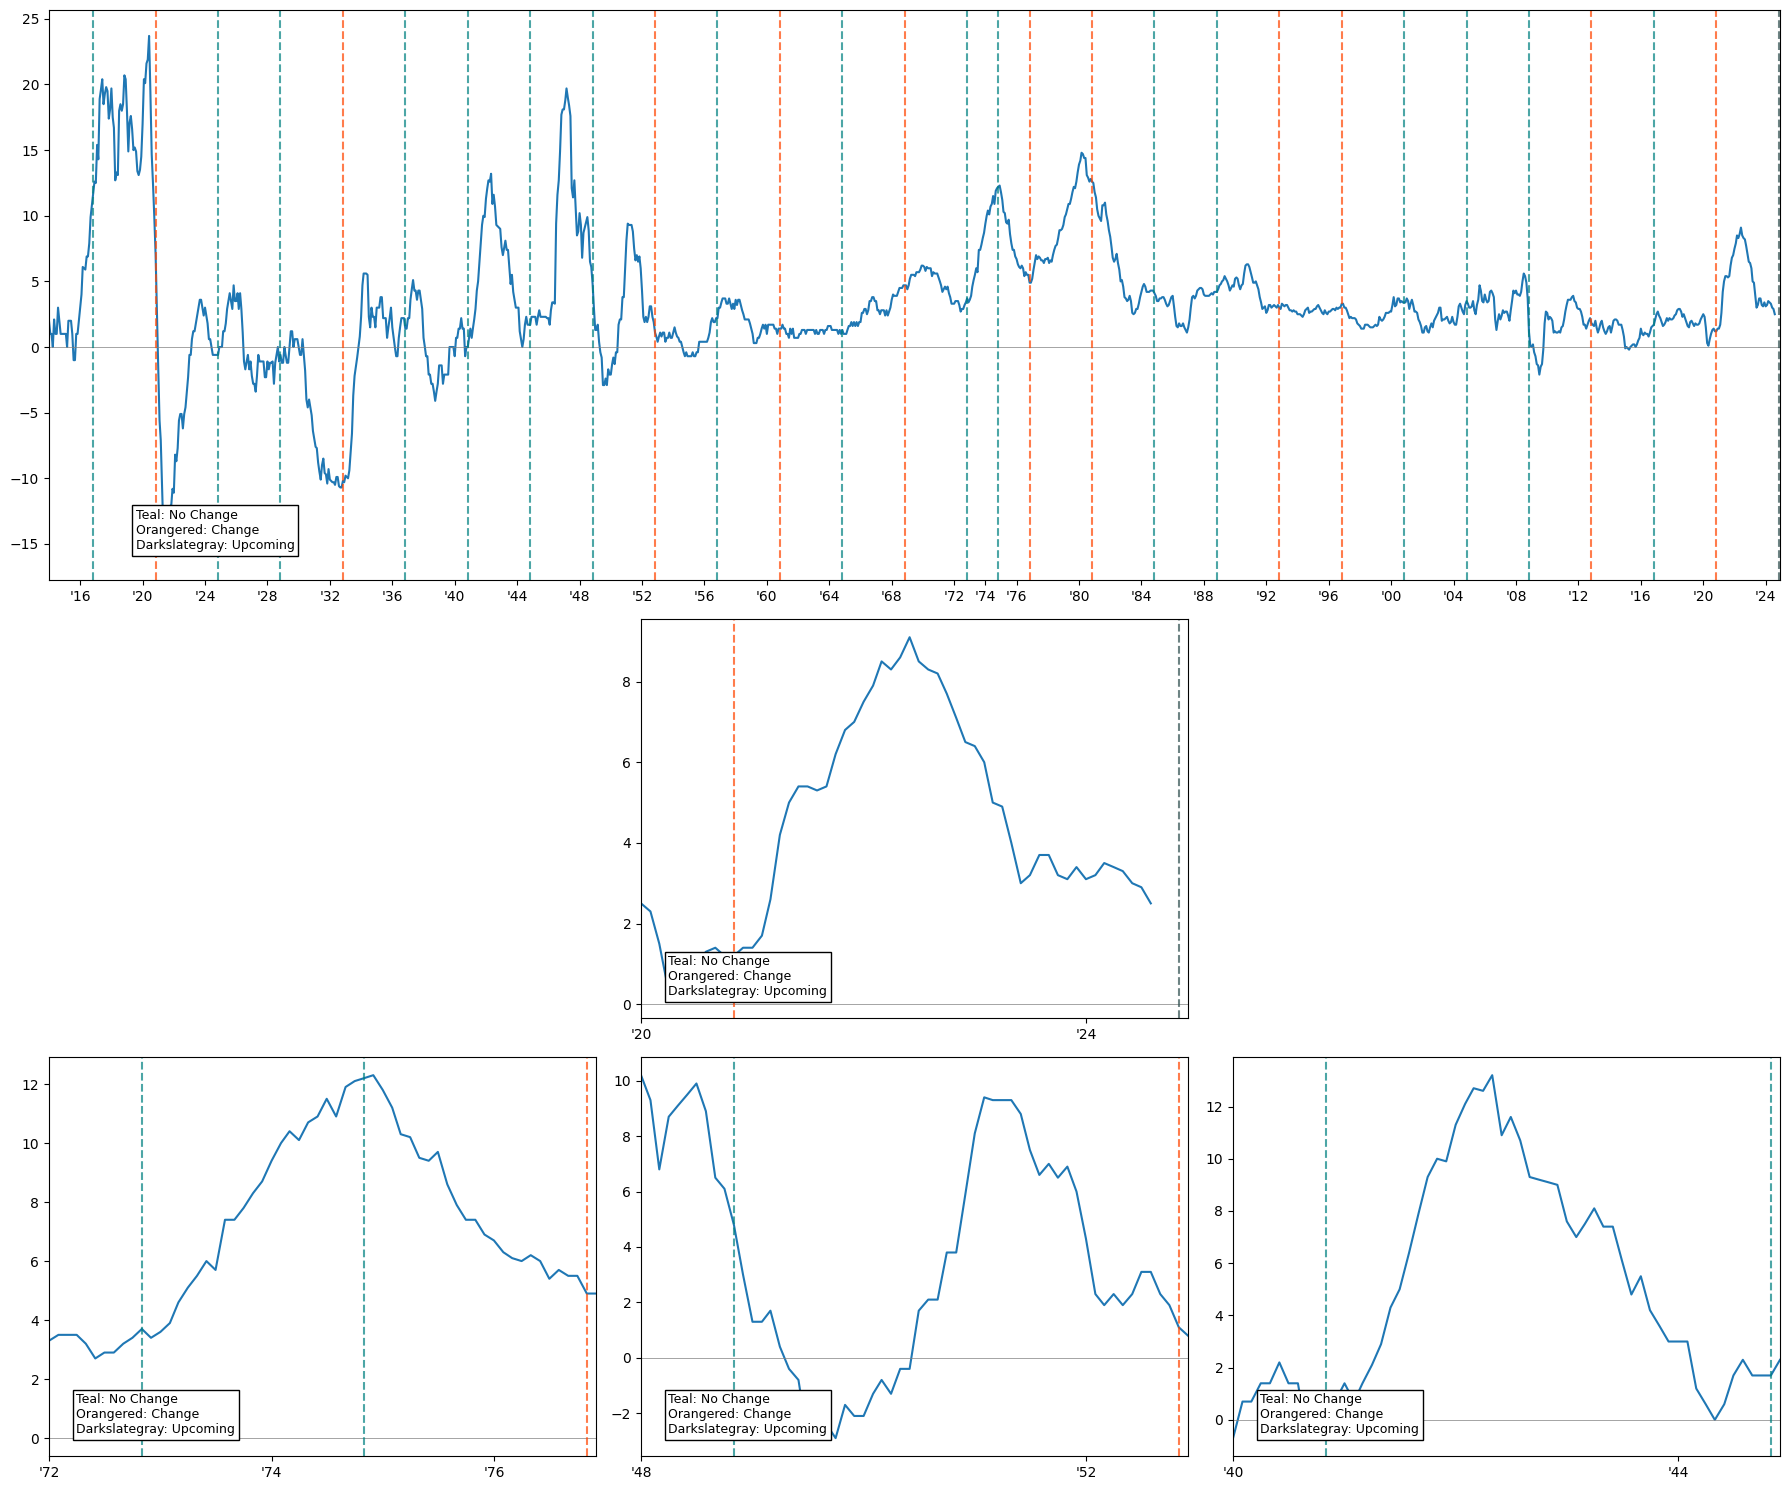

In [7]:
var = 'inflation'

# Create a figure
fig = plt.figure(figsize=(18, 15))  

# Create GridSpec
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.7, 0.7])

# Full width plot on top
ax_full = fig.add_subplot(gs[0, :])
plot(ax_full, df, var)

# Medium-sized chart centered in the middle row
ax_medium = fig.add_subplot(gs[1, 1])
plot(ax_medium, df, var, start_year=2020, end_year=2024)  

# Three smaller plots in a row at the bottom
ax1 = fig.add_subplot(gs[2, 0])
plot(ax1, df, var, start_year=1972, end_year=1976)

ax2 = fig.add_subplot(gs[2, 1])
plot(ax2, df, var, start_year=1948, end_year=1952)  

ax3 = fig.add_subplot(gs[2, 2])
plot(ax3, df, var, start_year=1940, end_year=1944)  

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Unemployment

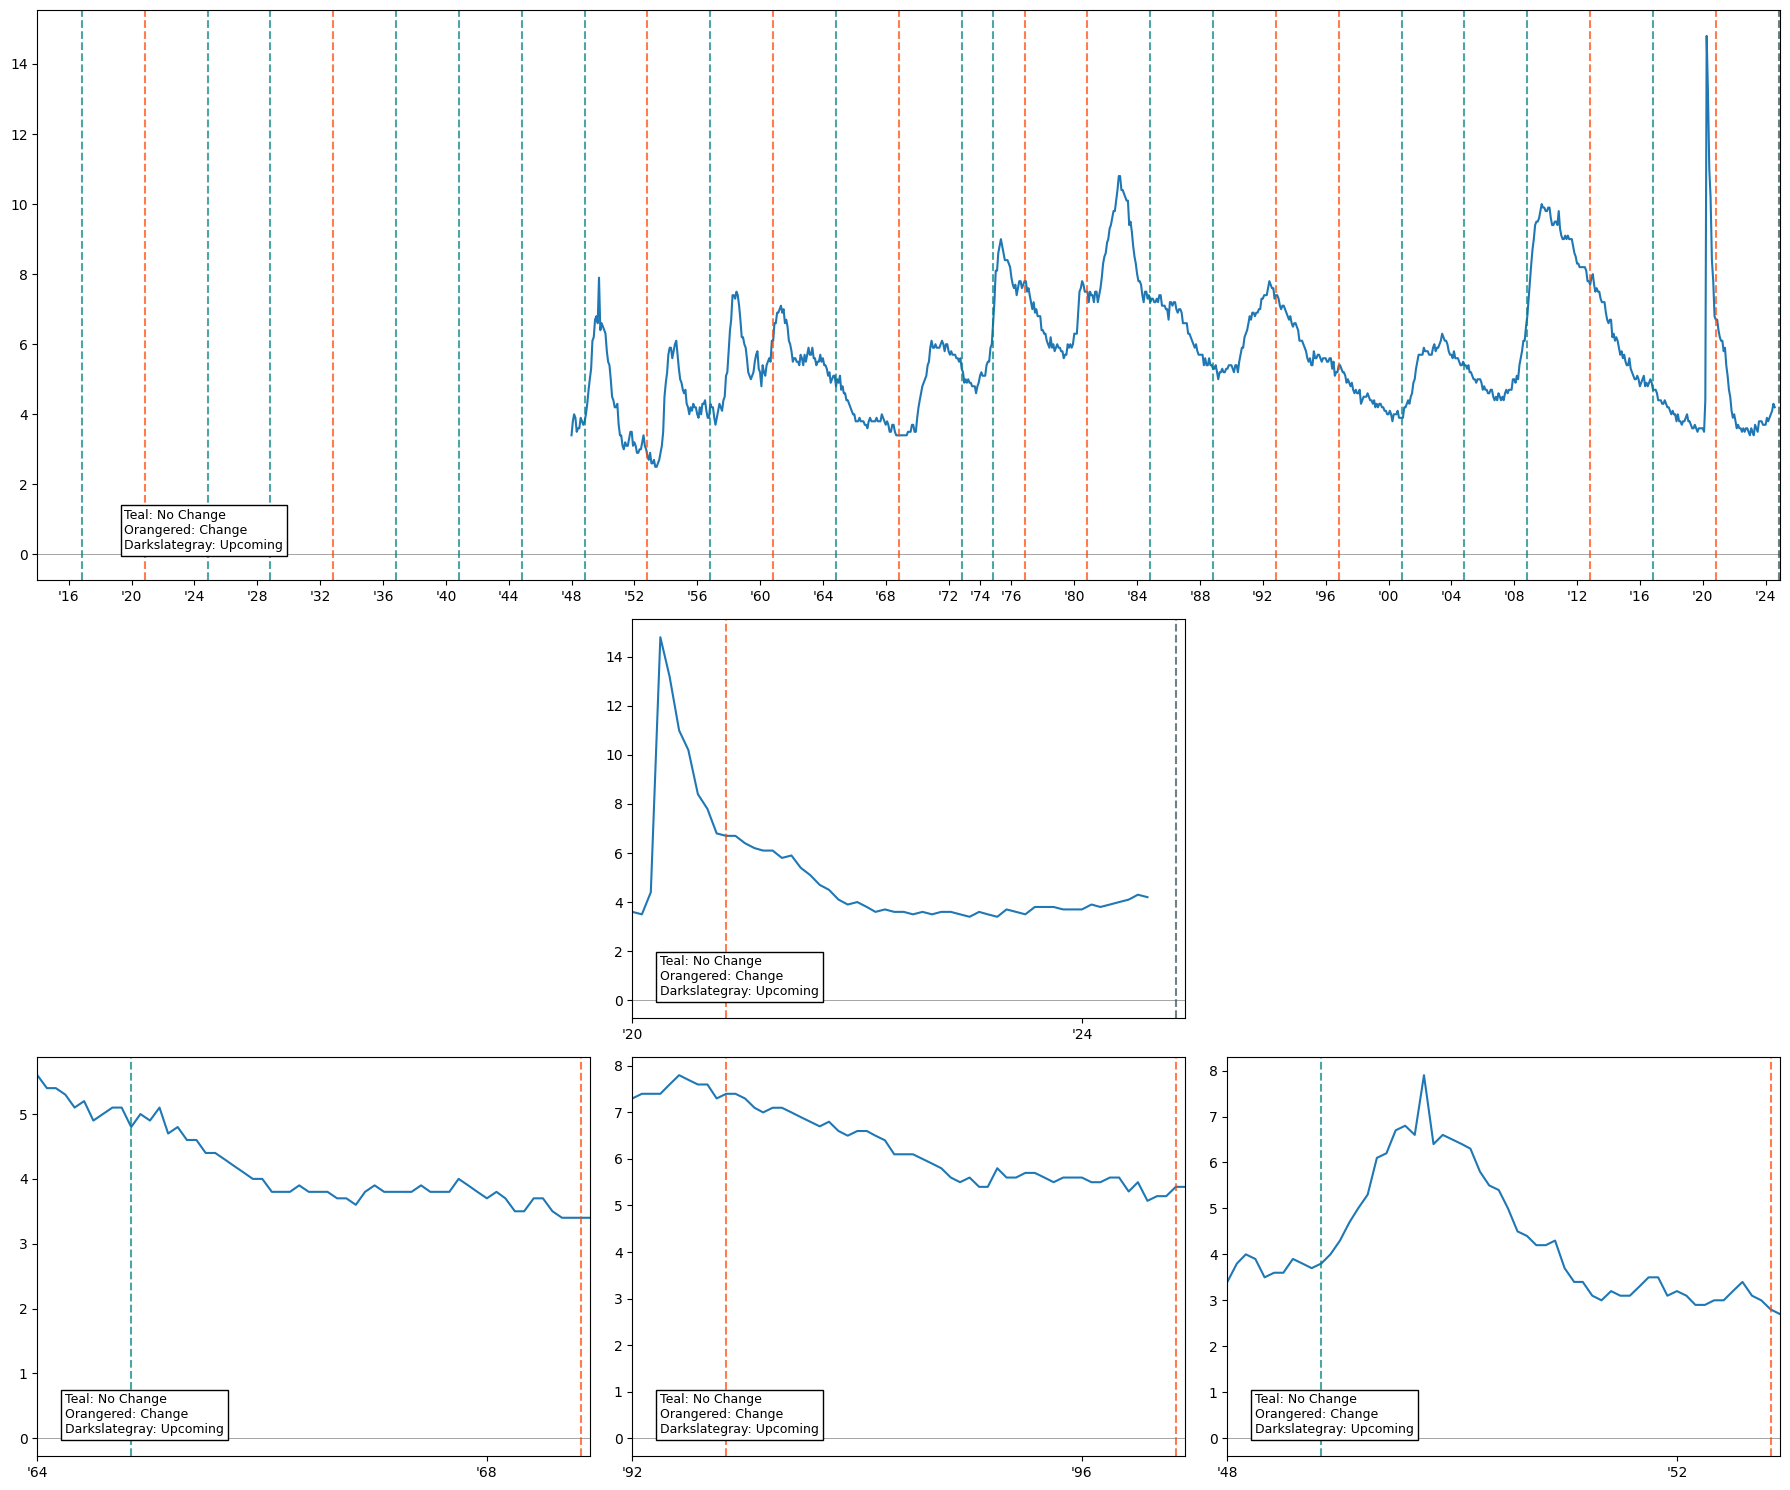

In [8]:
var = 'unemployment'

# Create a figure
fig = plt.figure(figsize=(18, 15))  

# Create GridSpec
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.7, 0.7])

# Full width plot on top
ax_full = fig.add_subplot(gs[0, :])
plot(ax_full, df, var)

# Medium-sized chart centered in the middle row
ax_medium = fig.add_subplot(gs[1, 1])
plot(ax_medium, df, var, start_year=2020, end_year=2024)  

# Three smaller plots in a row at the bottom
ax1 = fig.add_subplot(gs[2, 0])
plot(ax1, df, var, start_year=1964, end_year=1968)

ax2 = fig.add_subplot(gs[2, 1])
plot(ax2, df, var, start_year=1992, end_year=1996)  

ax3 = fig.add_subplot(gs[2, 2])
plot(ax3, df, var, start_year=1948, end_year=1952)  

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Interest Rate

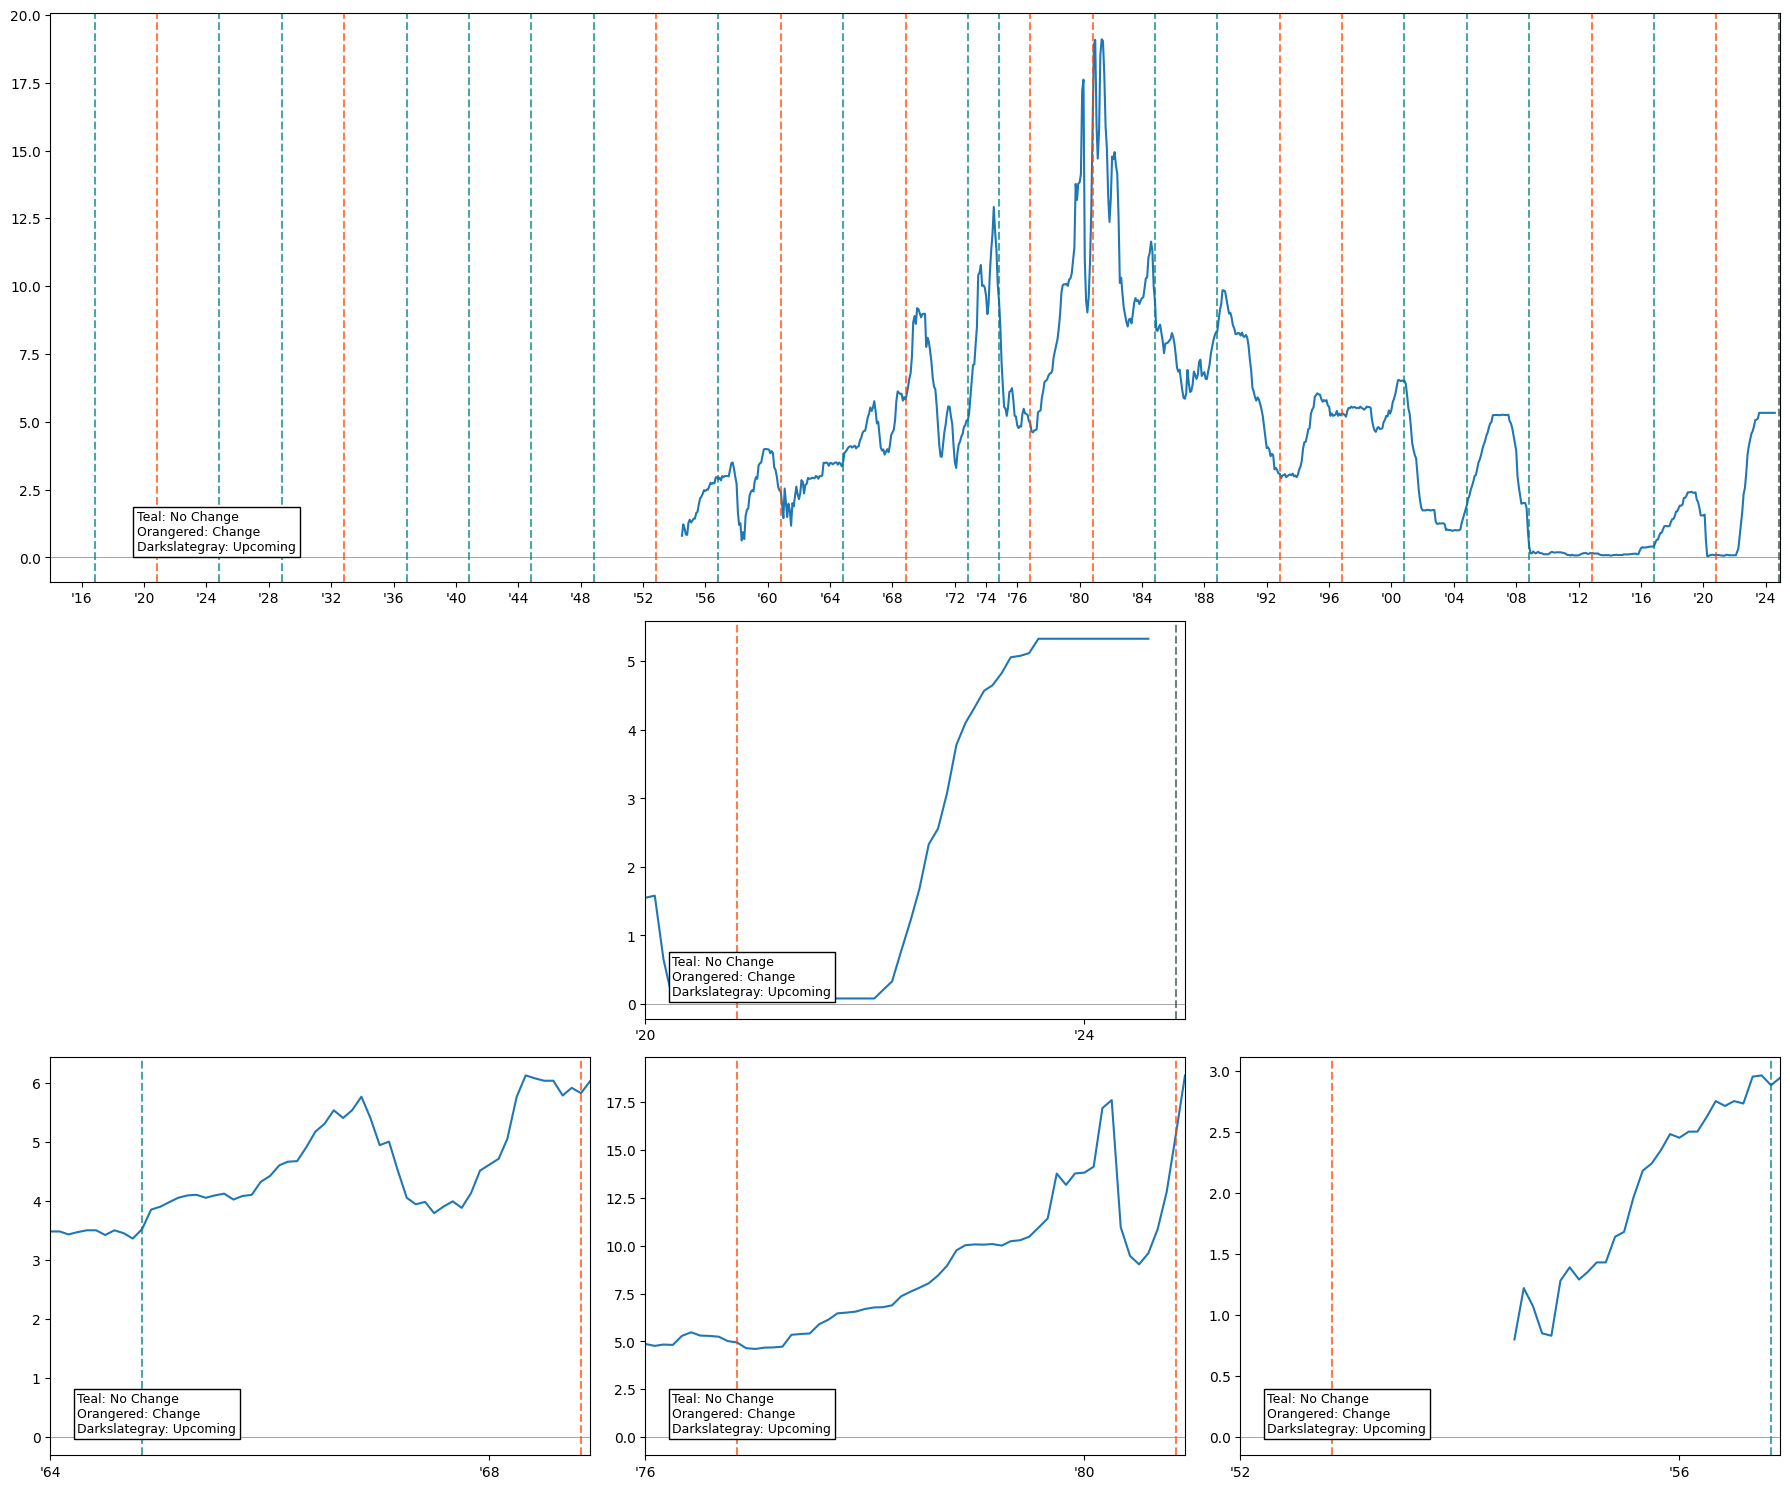

In [9]:
var = 'interest rate'

# Create a figure
fig = plt.figure(figsize=(18, 15))  

# Create GridSpec
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.7, 0.7])

# Full width plot on top
ax_full = fig.add_subplot(gs[0, :])
plot(ax_full, df, var)

# Medium-sized chart centered in the middle row
ax_medium = fig.add_subplot(gs[1, 1])
plot(ax_medium, df, var, start_year=2020, end_year=2024)  

# Three smaller plots in a row at the bottom
ax1 = fig.add_subplot(gs[2, 0])
plot(ax1, df, var, start_year=1964, end_year=1968)

ax2 = fig.add_subplot(gs[2, 1])
plot(ax2, df, var, start_year=1976, end_year=1980)  

ax3 = fig.add_subplot(gs[2, 2])
plot(ax3, df, var, start_year=1952, end_year=1956)  

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Growth

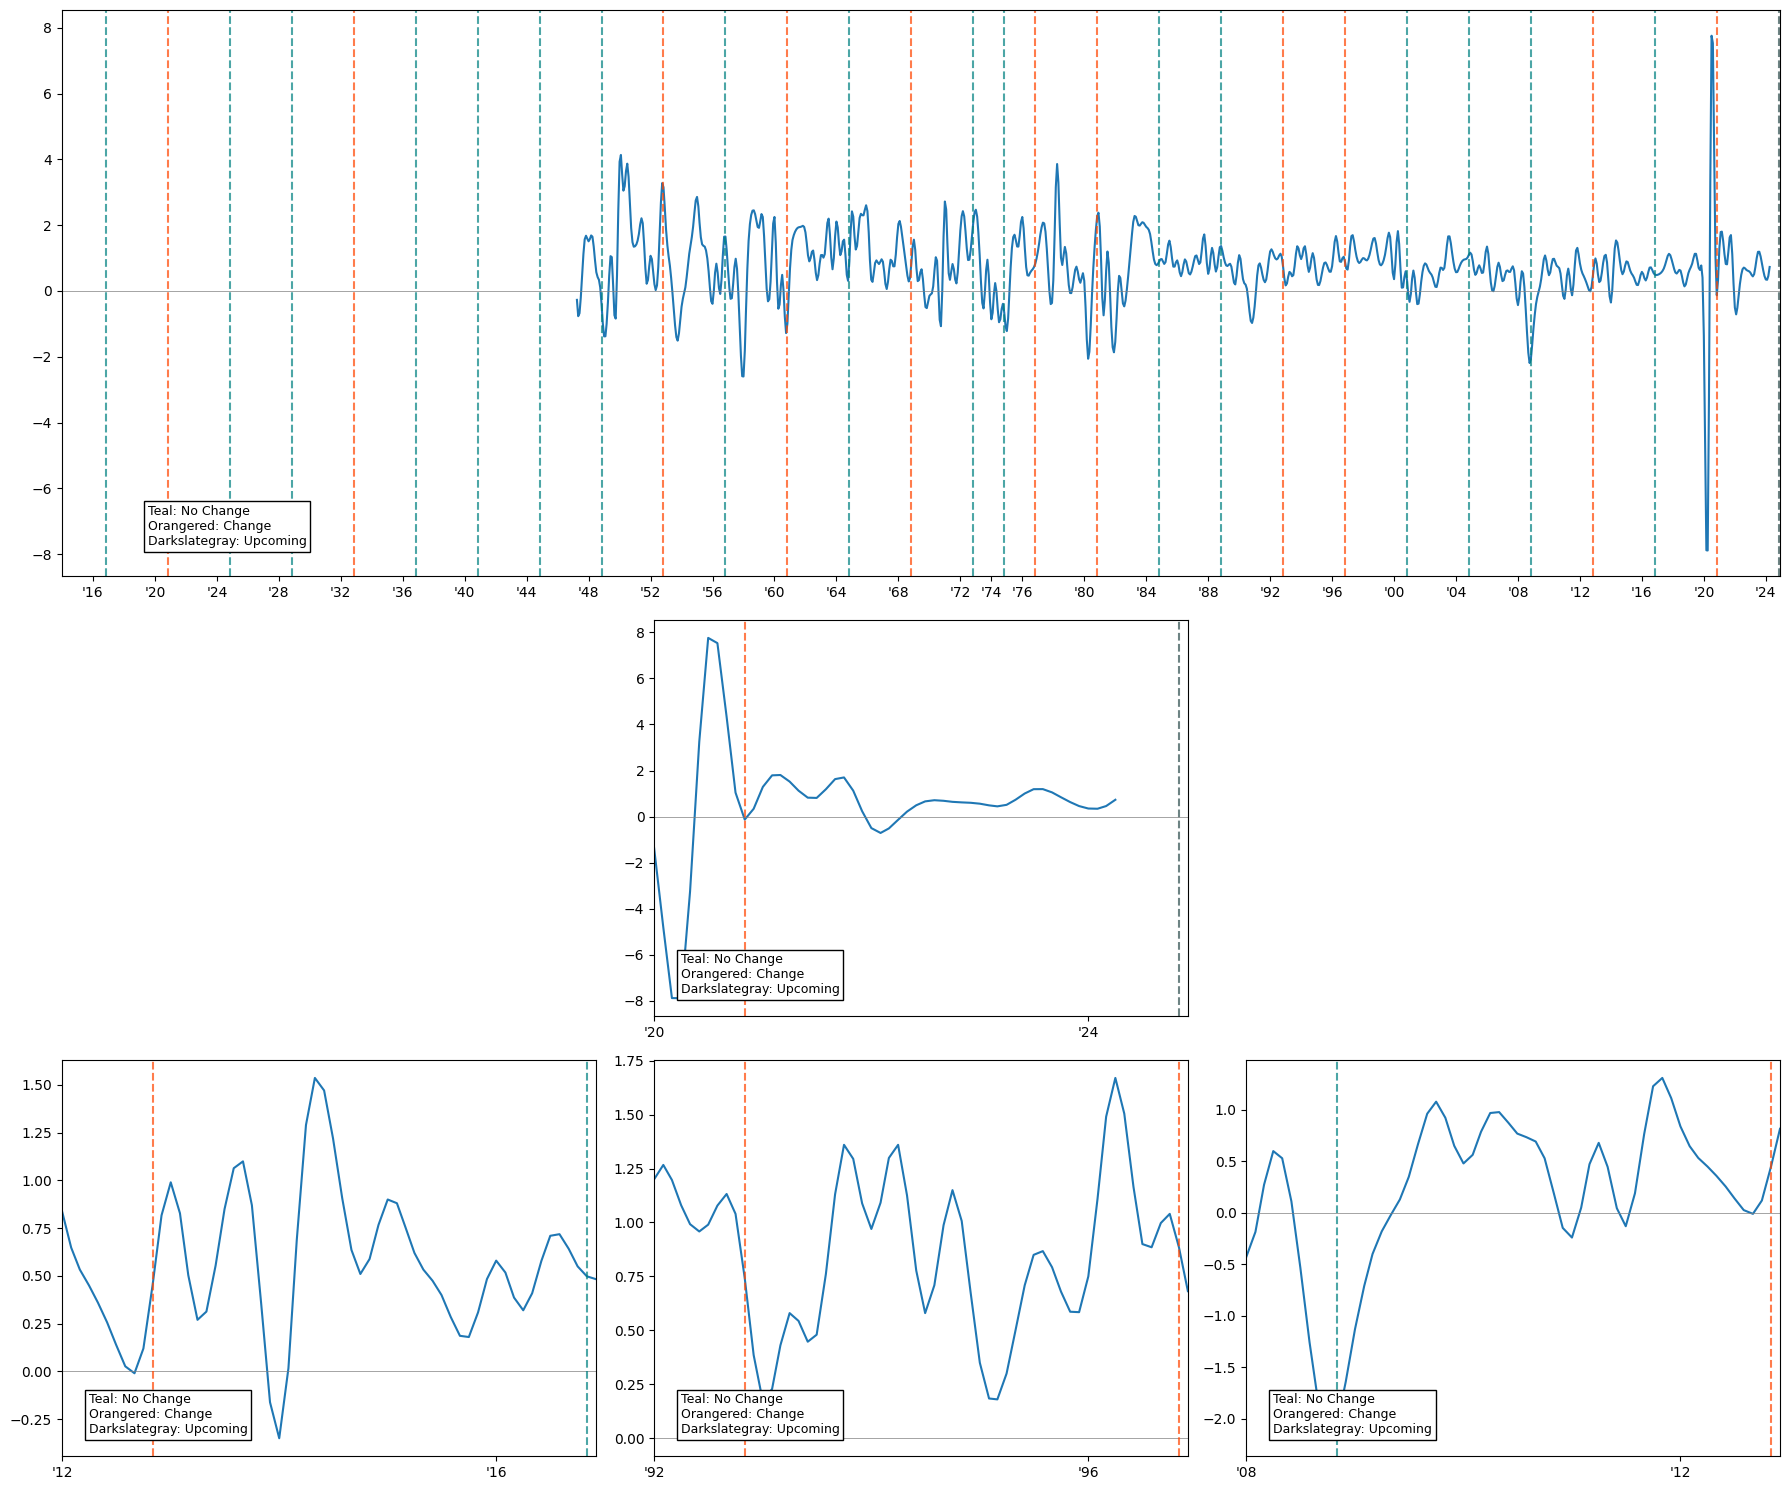

In [10]:
var = 'growth'

# Create a figure
fig = plt.figure(figsize=(18, 15))  

# Create GridSpec
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.7, 0.7])

# Full width plot on top
ax_full = fig.add_subplot(gs[0, :])
plot(ax_full, df, var)

# Medium-sized chart centered in the middle row
ax_medium = fig.add_subplot(gs[1, 1])
plot(ax_medium, df, var, start_year=2020, end_year=2024)  

# Three smaller plots in a row at the bottom
ax1 = fig.add_subplot(gs[2, 0])
plot(ax1, df, var, start_year=2012, end_year=2016)

ax2 = fig.add_subplot(gs[2, 1])
plot(ax2, df, var, start_year=1992, end_year=1996)  

ax3 = fig.add_subplot(gs[2, 2])
plot(ax3, df, var, start_year=2008, end_year=2012)  

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Consumer Confidence

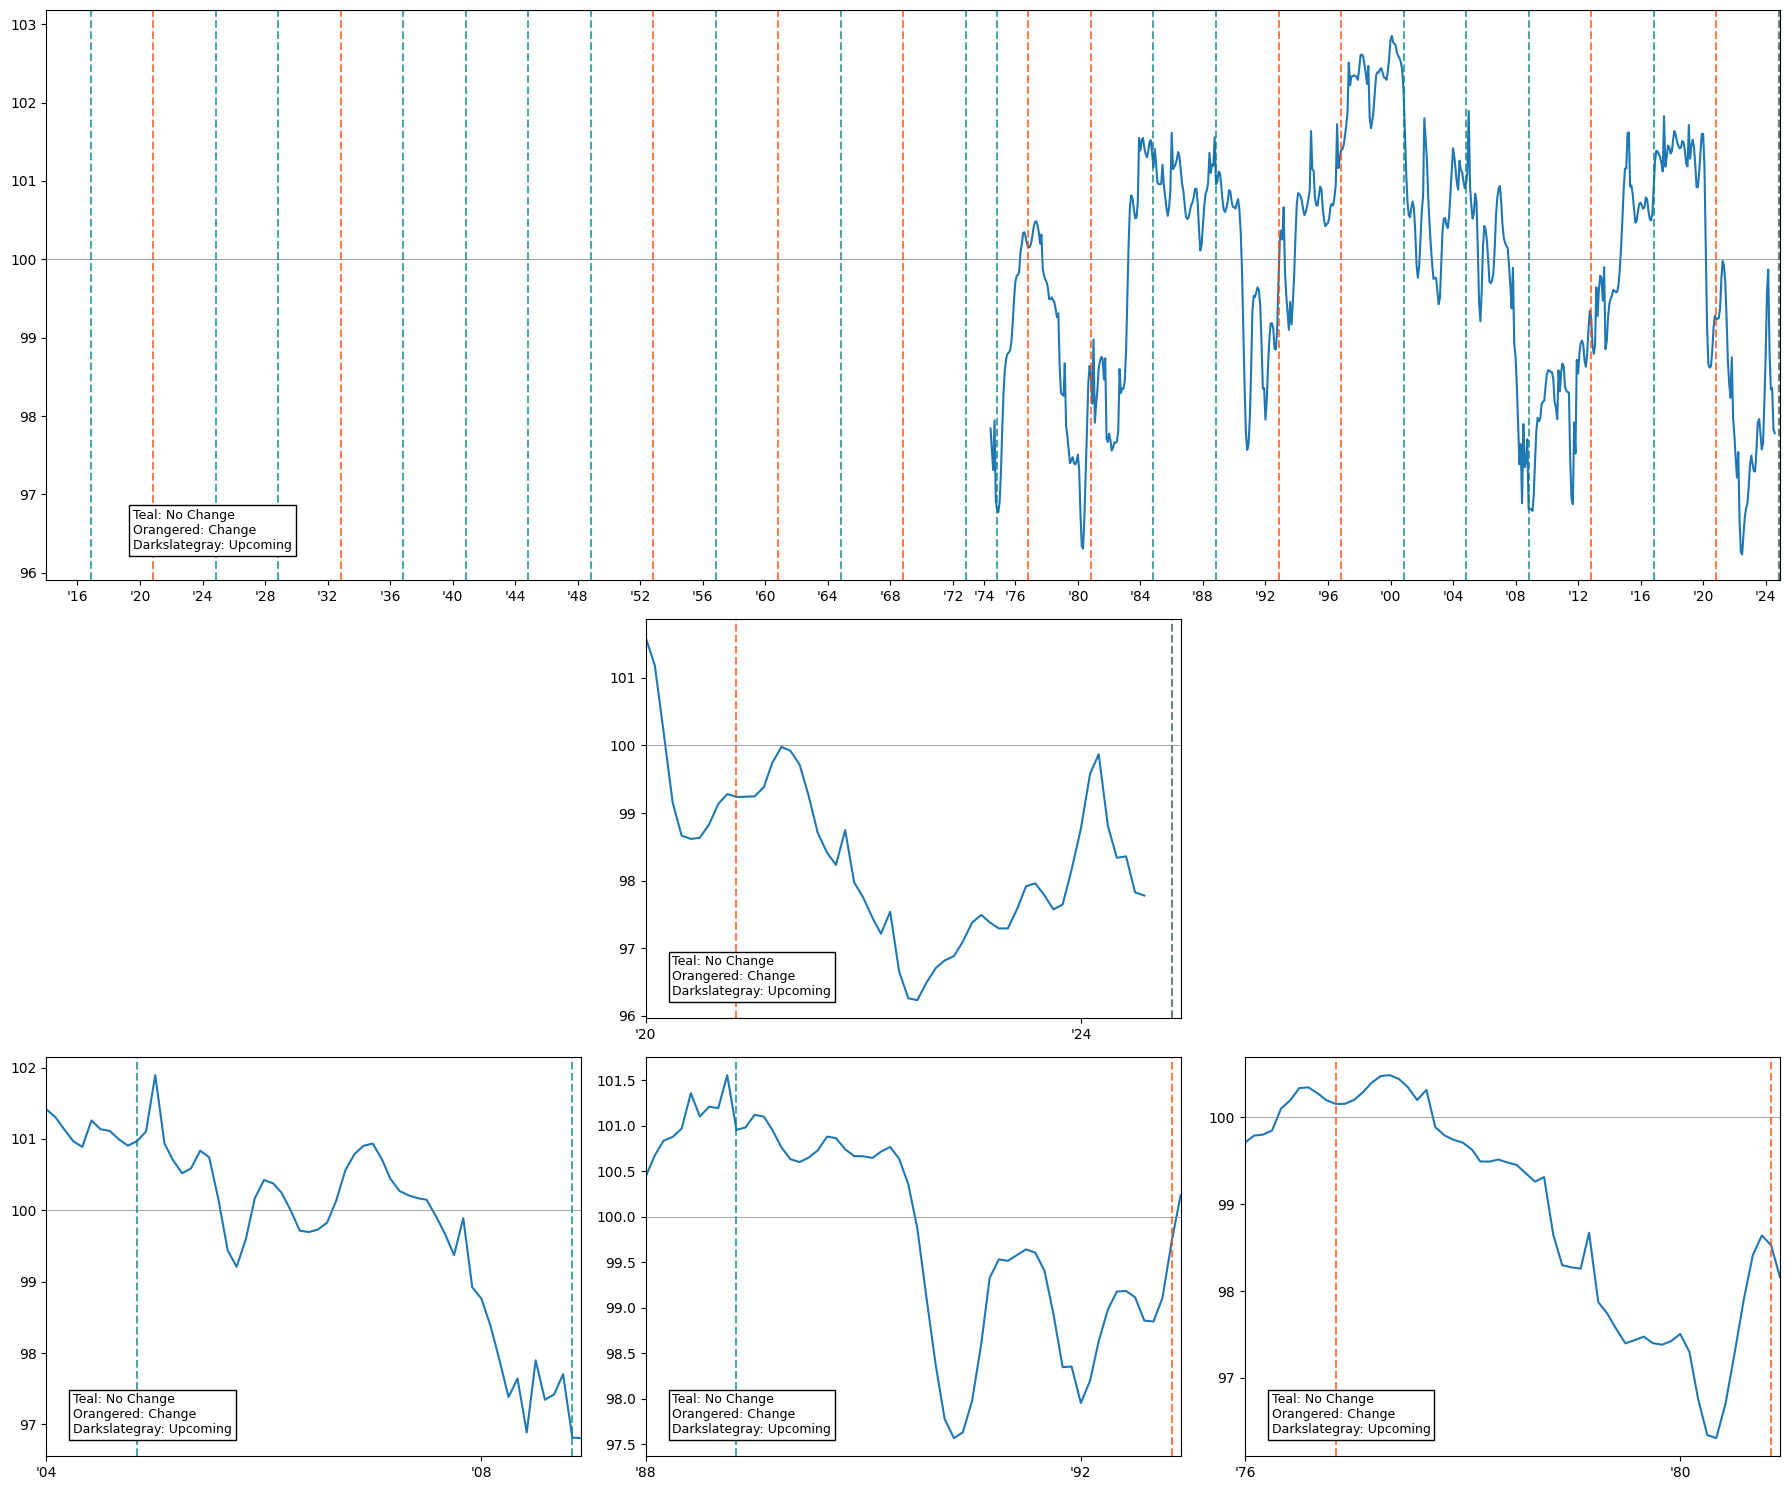

In [11]:
var = 'consumer confidence'

# Create a figure
fig = plt.figure(figsize=(18, 15))  

# Create GridSpec
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.7, 0.7])

# Full width plot on top
ax_full = fig.add_subplot(gs[0, :])
plot(ax_full, df, var, line=100)

# Medium-sized chart centered in the middle row
ax_medium = fig.add_subplot(gs[1, 1])
plot(ax_medium, df, column_name=var, start_year=2020, end_year=2024, line=100) 

# Three smaller plots in a row at the bottom
ax1 = fig.add_subplot(gs[2, 0])
plot(ax1, df, var, start_year=2004, end_year=2008, line=100)

ax2 = fig.add_subplot(gs[2, 1])
plot(ax2, df, var, start_year=1988, end_year=1992, line=100)  

ax3 = fig.add_subplot(gs[2, 2])
plot(ax3, df, var, start_year=1976, end_year=1980, line=100)  

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Prediction

### Import

In [12]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
df.head()

,date,inflation,unemployment,interest rate,growth,consumer confidence,term
0,1914-01-01,2.0,NaN,NaN,NaN,NaN,NaN
1,1914-02-01,1.0,NaN,NaN,NaN,NaN,NaN
2,1914-03-01,1.0,NaN,NaN,NaN,NaN,NaN
3,1914-04-01,0.0,NaN,NaN,NaN,NaN,NaN
4,1914-05-01,2.1,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [14]:
df = df.dropna(subset=['term'])

# Reset the index 
df = df.reset_index(drop=True)
df.head()

,date,inflation,unemployment,interest rate,growth,consumer confidence,term
0,1916-11-01,11.7,NaN,NaN,NaN,NaN,0.0
1,1920-11-01,7.0,NaN,NaN,NaN,NaN,1.0
2,1924-11-01,-0.6,NaN,NaN,NaN,NaN,0.0
3,1928-11-01,-0.6,NaN,NaN,NaN,NaN,0.0
4,1932-11-01,-10.2,NaN,NaN,NaN,NaN,1.0


In [15]:
# Separate features and target
X = df.drop('term', axis=1)
y = df['term']

# Identify datetime columns
datetime_columns = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numeric (number of days since the earliest date)
for col in datetime_columns:
    X[col] = (X[col] - X[col].min()).dt.total_seconds() / (24 * 60 * 60)

# Ensure all columns are numeric
X = X.select_dtypes(include=['float64', 'int64'])

# Impute missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Handle missing values in the target variable
# Drop rows where the target is NaN
mask = y.notna()
X_imputed = X_imputed[mask]
y = y[mask]

### Split Test-Train

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=1)

### Scaling

In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train

In [18]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Test

In [19]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

